**Assessment Task 1: Exploratory Data Analysis**

This is the code base for assessment task 1: Exploratory Data Analysis.

For this code, I will need `numpy` for numerical computations, `pandas` for data wrangling, and `matplotlib` and `seaborn` for plotting. I import them in the below cell.

# Import libraries and data parsing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The next two cells imports the raw data file, with different delimiter options to parse the file. It then displays the first ten rows of the parsed data.

In [2]:
file_name = "TeleCom_Data.csv"
data = pd.read_csv(file_name, delimiter='"";""|;|";"|;"', engine='python')

In [3]:
data.head(10)

,"""age","""""job",marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,"y"""""""
0,"""40","""""admin.",married,basic.6y,no,no,no,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
1,"""56","""""services",married,high.school,no,no,yes,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
2,"""45","""""services",married,basic.9y,unknown,no,no,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
3,"""59","""""admin.",married,professional.course,no,no,no,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
4,"""41","""""blue-collar",married,unknown,unknown,no,no,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
5,"""24","""""technician",single,professional.course,no,yes,no,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
6,"""25","""""services",single,high.school,no,yes,no,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
7,"""41","""""blue-collar",married,unknown,unknown,no,no,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
8,"""25","""""services",single,high.school,no,yes,no,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""
9,"""29","""""blue-collar",single,high.school,no,no,yes,telephone,may,"mon""""",...,1,999,0,"""""nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"""""no"""""""


Next, I check the dimension of the dataset, and whether it contains any explicit null values.

In [4]:
data.shape

(41180, 21)

In [5]:
data.isna().any()

"age              False
""job             False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y"""              False
dtype: bool

Some immediate observations from the dataset:

- There are no explicit missing values from first impression.

- Some parsing issues with the dataset, mainly because of inconsistencies in terms of delimiters. I will fix this issue in the next section.

It's also good to check the data types for each column as they are now.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   "age            41180 non-null  object 
 1   ""job           41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

It looks like `age` is of the wrong data type. This is because of the parsing issue, which I will attempt to fix in the next section.

# Data cleaning

For data cleaning, I will do the following:
- Rename columns with extra double-quotes
- Fix columns with values polluted by extra double-quotes
- Check that all variables are of a suitable data type

## Rename columns

In [7]:
# Declare a name_dict with keys being the value to replace, and values being the replacement values
name_dict = {
    '"age': 'age',
    '""job': 'job',
    'y"""': 'y'
}

data.rename(name_dict, axis='columns', inplace=True)

In [8]:
# Double check variable names: they should now have properly formatted names
for col in data.columns:
    print(col)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y


## Column: Age

In [9]:
data['age'].replace('"', '', regex=True, inplace=True)

In [10]:
data['age'].head()

0    40
1    56
2    45
3    59
4    41
Name: age, dtype: object

I notice that age is looking good now, but the column is still of type object. The below cell will ensure that there is no age that looks like a `float`, so that I can safely cast everything as `int`. I will do this by printing out all unique values in the column.

In [11]:
data['age'].unique()

array(['40', '56', '45', '59', '41', '24', '25', '29', '57', '35', '54',
       '46', '39', '30', '55', '37', '49', '34', '52', '58', '32', '38',
       '44', '42', '60', '53', '50', '47', '51', '48', '33', '31', '43',
       '36', '28', '27', '26', '22', '23', '20', '21', '61', '19', '18',
       '70', '66', '76', '67', '73', '88', '95', '77', '68', '75', '63',
       '80', '62', '65', '72', '82', '64', '71', '69', '78', '85', '79',
       '83', '81', '74', '17', '87', '91', '86', '98', '94', '84', '92',
       '89'], dtype=object)

It looks like it's safe to cast the whole column as `int`.

In [12]:
data['age'] = data['age'].astype(int)

## Column: Job

In [13]:
data['job'].replace('""', '', regex=True, inplace=True)

In [14]:
data['job'].head()

0         admin.
1       services
2       services
3         admin.
4    blue-collar
Name: job, dtype: object

## Column: Day of week

In [15]:
data['day_of_week'].replace('""', '', regex=True, inplace=True)
data['day_of_week'].head()

0    mon
1    mon
2    mon
3    mon
4    mon
Name: day_of_week, dtype: object

## Column: poutcome

In [16]:
data['poutcome'].replace('""', '', regex=True, inplace=True)
data['poutcome'].head()

0    nonexistent
1    nonexistent
2    nonexistent
3    nonexistent
4    nonexistent
Name: poutcome, dtype: object

## Column: y

In [17]:
data['y'].replace('[""]|["""]', '', regex=True, inplace=True)
data['y'].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

## Re-checking data types and unique values

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

All columns are now of appropriate data types. Now I move on to exploratory data analysis.

# Exploratory Data Analysis (EDA)

For EDA, I will be performing the following to get an understanding of the general structure of the dataset:

- Descriptive statistics
- Distribution plots 
- Bivariate plots
- Dependence plots

## Descriptive statistics for numerical data, and missing value analysis

In [19]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000
mean,40.021710,258.280427,2.567800,962.516707,0.172705,0.081901,93.575508,-40.501999,3.621422,5167.053344
std,10.419593,259.299856,2.770225,186.809028,0.493719,1.571037,0.578762,4.627358,1.734385,72.230334
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


For this set of numerical variables, I notice that the `pdays` column has a dominating value of 999. This is usually to denote a missing value (Nahhas, 2022), so I will attempt to impute them.

Looking up the data dictionary, `previous` is the column I can utilise, because it has information on the number of contacts performed before this campaign and for this client. So naturally, `pdays` is dependent on `previous` in that: 
- If `previous = 0`: then `pdays = -1`, which is to denote that the customer was not previously contacted (per the data dictionary)
- If `previous != 0`: then `pdays` may vary.

I will check the relationship between these two variables, to see what options I have for imputation when `previous != 0`.

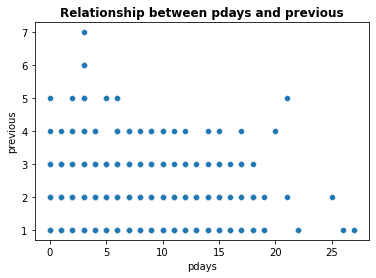

In [20]:
# Scatterplot relationship
sns.scatterplot(data=data[(data['pdays']!=999)], x='pdays', y='previous')
plt.title('Relationship between pdays and previous', weight='bold')
plt.show()

In [21]:
# Pearson correlation
data[(data['pdays']!=999)][[
    'previous',
    'pdays'
]].corr()

,previous,pdays
previous,1.000000,-0.036285
pdays,-0.036285,1.000000


So the relationship is not linear, and the Pearson coefficient suggests that there may be no relationship at all. 

I will also check the distribution of `pdays` values, less the 999 values, and report their mean and variance.

In [22]:
pdays_mean = data[(data['pdays']!=999)]['pdays'].mean()
pdays_var = data[(data['pdays']!=999)]['pdays'].var()

print(f'pdays mean without missing values: {pdays_mean:.3f}')
print(f'pdays variance without missing values: {pdays_var:.3f}')

pdays mean without missing values: 6.018
pdays variance without missing values: 14.633


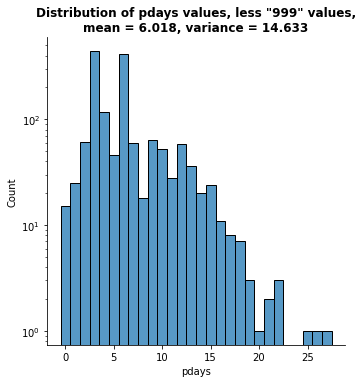

In [23]:
sns.displot(
    data=data[(data['pdays']!=999)],
    x='pdays',
    discrete=True
)
plt.yscale('log')
plt.title(f'Distribution of pdays values, less "999" values,\nmean = {pdays_mean:.3f}, variance = {pdays_var:.3f}', weight='bold')
plt.show()

This column does not follow any standard distribution that I can immediately see.

From the above results, imputation methods via mean/median/mode and parametric models like linear regression may not be the most optimal. I will use a simple technique called *random hot deck imputation*, which randomly assigns a value for `pdays` conditional on `previous = i`, for $i \in \{\text{sample space of 'previous'}\}$. In other words, values for `pdays` will be randomly drawn from the empirical conditional probability mass function observed from the non-missing data: 

$$p(\text{pdays} | \text{previous}=i)\text{, for } i \in \{\text{sample space of 'previous'}\}$$

According to Andridge & Little (2010), this method is better than other parametric model-based methods, such as kNN or regression, because it does not have to worry about model assumptions. It also reduces bias, which is superior to popular methods like mean/median/mode imputations. The only limitation is that it may disturb the variance of the whole column; but this is a reasonable tradeoff for simplicity.

The next cell checks the sample space of the `previous` variable.

In [24]:
data['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

So now I know that I have to calculate $p(\text{pdays} | \text{previous}=i)\text{, for } i \in \{1,2,...,7\}$, excluding 0 because it is deterministic.

In [25]:
# Setting all missing instances of pdays where 'previous = 0' to -1
data.loc[
    (data['pdays'] == 999) &
    (data['previous'] == 0),
    'pdays'
] = -1

In the following cell, I define three functions to impute missing values:
1. `generate_empirical_conditional_pmf()`: takes the data, and a `previous` value other than zero, and returns the conditional pmf at $previous = i$
2. `get_size_999()`: helper function to get the size of the missing vector depending on the value of `previous`
3. `generate_random_pdays_vector()`: takes the outputs of function 1 and use those and function 2 to generate data.

In [26]:
def generate_empirical_conditional_pmf(
        data: pd.DataFrame, 
        previous: int
) -> (np.ndarray, np.ndarray):
    """
    Generates the empirical conditional probability mass function (pmf) of `pdays` values, given
    a value of `previous`.
    
    ------------
    Input(s):
    data : input data
    previous : number of contacts performed before this campaign and for this client 
    
    ------------
    Output(s):
    pdays : the conditional sample space for `pdays`
    conditional_probability : the corresponding conditional probabilities for `pdays`
    
    """
    # Assert validity conditions
    assert previous != 0, 'Previous cannot be zero; this outcome is deterministic.'
    assert previous in range(1, 8), 'Previous cannot be outside pmf range.'
    
    # Define data masks to filter the dataset on
    mask_not_999 = data['pdays'] != 999
    mask_previous = data['previous'] == previous
    
    # Filter the dataset according to masks, then choose `pdays` column
    conditional_pdays = data[mask_not_999 & mask_previous]['pdays']
    
    # Get probabilities by retrieving normalised value counts
    probability_of_values = conditional_pdays.value_counts(normalize=True)
    
    # Retrieve the results and return them
    pdays = probability_of_values.index
    conditional_probability = probability_of_values.values
    
    return pdays, conditional_probability


def get_size_999(
        data: pd.DataFrame,
        previous: int
) -> int:
    """
    Gets the size of the missing instances vector, depending on the value of `previous`.
    
    ------------
    Input(s):
    data : input data
    previous : number of contacts performed before this campaign and for this client 
    
    ------------
    Output(s):
    vector_size : the size of the missing instances vector.
    
    """
    # Filter missing data
    mask_999 = data['pdays'] == 999
    mask_previous = data['previous'] == previous
    
    # Get the missing data vector size
    vector_size = len(data[mask_999 & mask_previous])
    
    return vector_size    


def generate_random_pdays_vector(
        val: np.ndarray,
        prob: np.ndarray,
        data: pd.DataFrame,
        previous: int,
        seed: int=1
) -> np.ndarray:
    """
    Generates the random pdays vector according to the empirical conditional pmf.
    
    ------------
    Input(s):
    val : the conditional sample space for `pdays`
    prob : the corresponding conditional probabilities for `pdays`
    data : input data
    previous : number of contacts performed before this campaign and for this client
    seed (default=1) : the random seed for the Numpy random generator, for reproducibility
    
    ------------
    Output(s):
    random_pdays_vector : the generated random vector.    
    
    """
    # Set the random seed for reproducibility
    np.random.seed(seed)
    
    # Generate the random pdays vector
    random_pdays_vector = np.random.choice(
        a=val,
        size=get_size_999(data, previous),
        replace=True,
        p=prob
    )
    
    return random_pdays_vector


In [27]:
# Generate and fill the data into the dataframe
for i in range(1, 8):
    cond_pdays, cond_prob = generate_empirical_conditional_pmf(data, i)
    rand_pdays_vec = generate_random_pdays_vector(cond_pdays, cond_prob, data, i)
    
    data.loc[
        (data['pdays'] == 999) &
        (data['previous'] == i),
        'pdays'
    ] = rand_pdays_vec

After imputing the data, I will recheck the mean, variance, and distribution of the column. For the distribution, I will leave out the value '-1' because it's not a valid data point, it's just a way to denote that the customer hasn't been contacted before.

In [28]:
pdays_mean_new = data[(data['pdays'] != -1)]['pdays'].mean()
pdays_var_new = data[(data['pdays'] != -1)]['pdays'].var()

print(f'pdays mean without "-1" values: {pdays_mean_new:.3f}')
print(f'pdays variance without "-1" values: {pdays_var_new:.3f}')

pdays mean without "-1" values: 6.026
pdays variance without "-1" values: 14.977


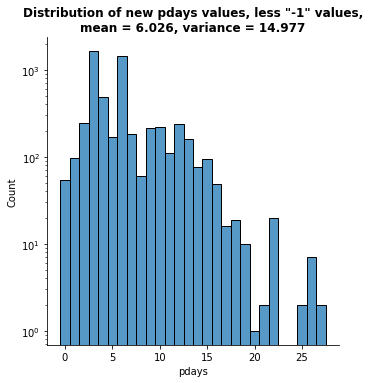

In [29]:
sns.displot(
    data=data[data['pdays'] != -1],
    x='pdays',
    discrete=True
)

plt.title(f'Distribution of new pdays values, less "-1" values,\nmean = {pdays_mean_new:.3f}, variance = {pdays_var_new:.3f}', weight='bold')
plt.yscale('log')
plt.show()

The result is that the mean, variance, and even shape of the new distribution remained almost the same as before, so I am at a win.

## Distribution plots

### Numeric vs. categorical columns

In this subsection, I will calculate the number of numeric and categorical columns, in preparation for the series of plotting that follow.

In [30]:
num_cols = data.select_dtypes(exclude='object').columns
obj_cols = data.select_dtypes(include='object').columns

In [31]:
print(f'Number of numeric columns: {len(num_cols)}')
print(f'Number of categorical columns: {len(obj_cols)}')

Number of numeric columns: 10
Number of categorical columns: 11


### Categorical data statistics and plots

The cell below is a descriptive statistics table for the categorical columns. Here, I see the most popular segments of customers in the `top` row, as well as the unique number of categories in each column.

In [32]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24921,12166,32581,21571,33943,26140,13765,8622,35559,36542


The below plots will extend on this table, and also group by the response variable, so I have an idea of which customer segments are most excited about the new telecom subscription plan.

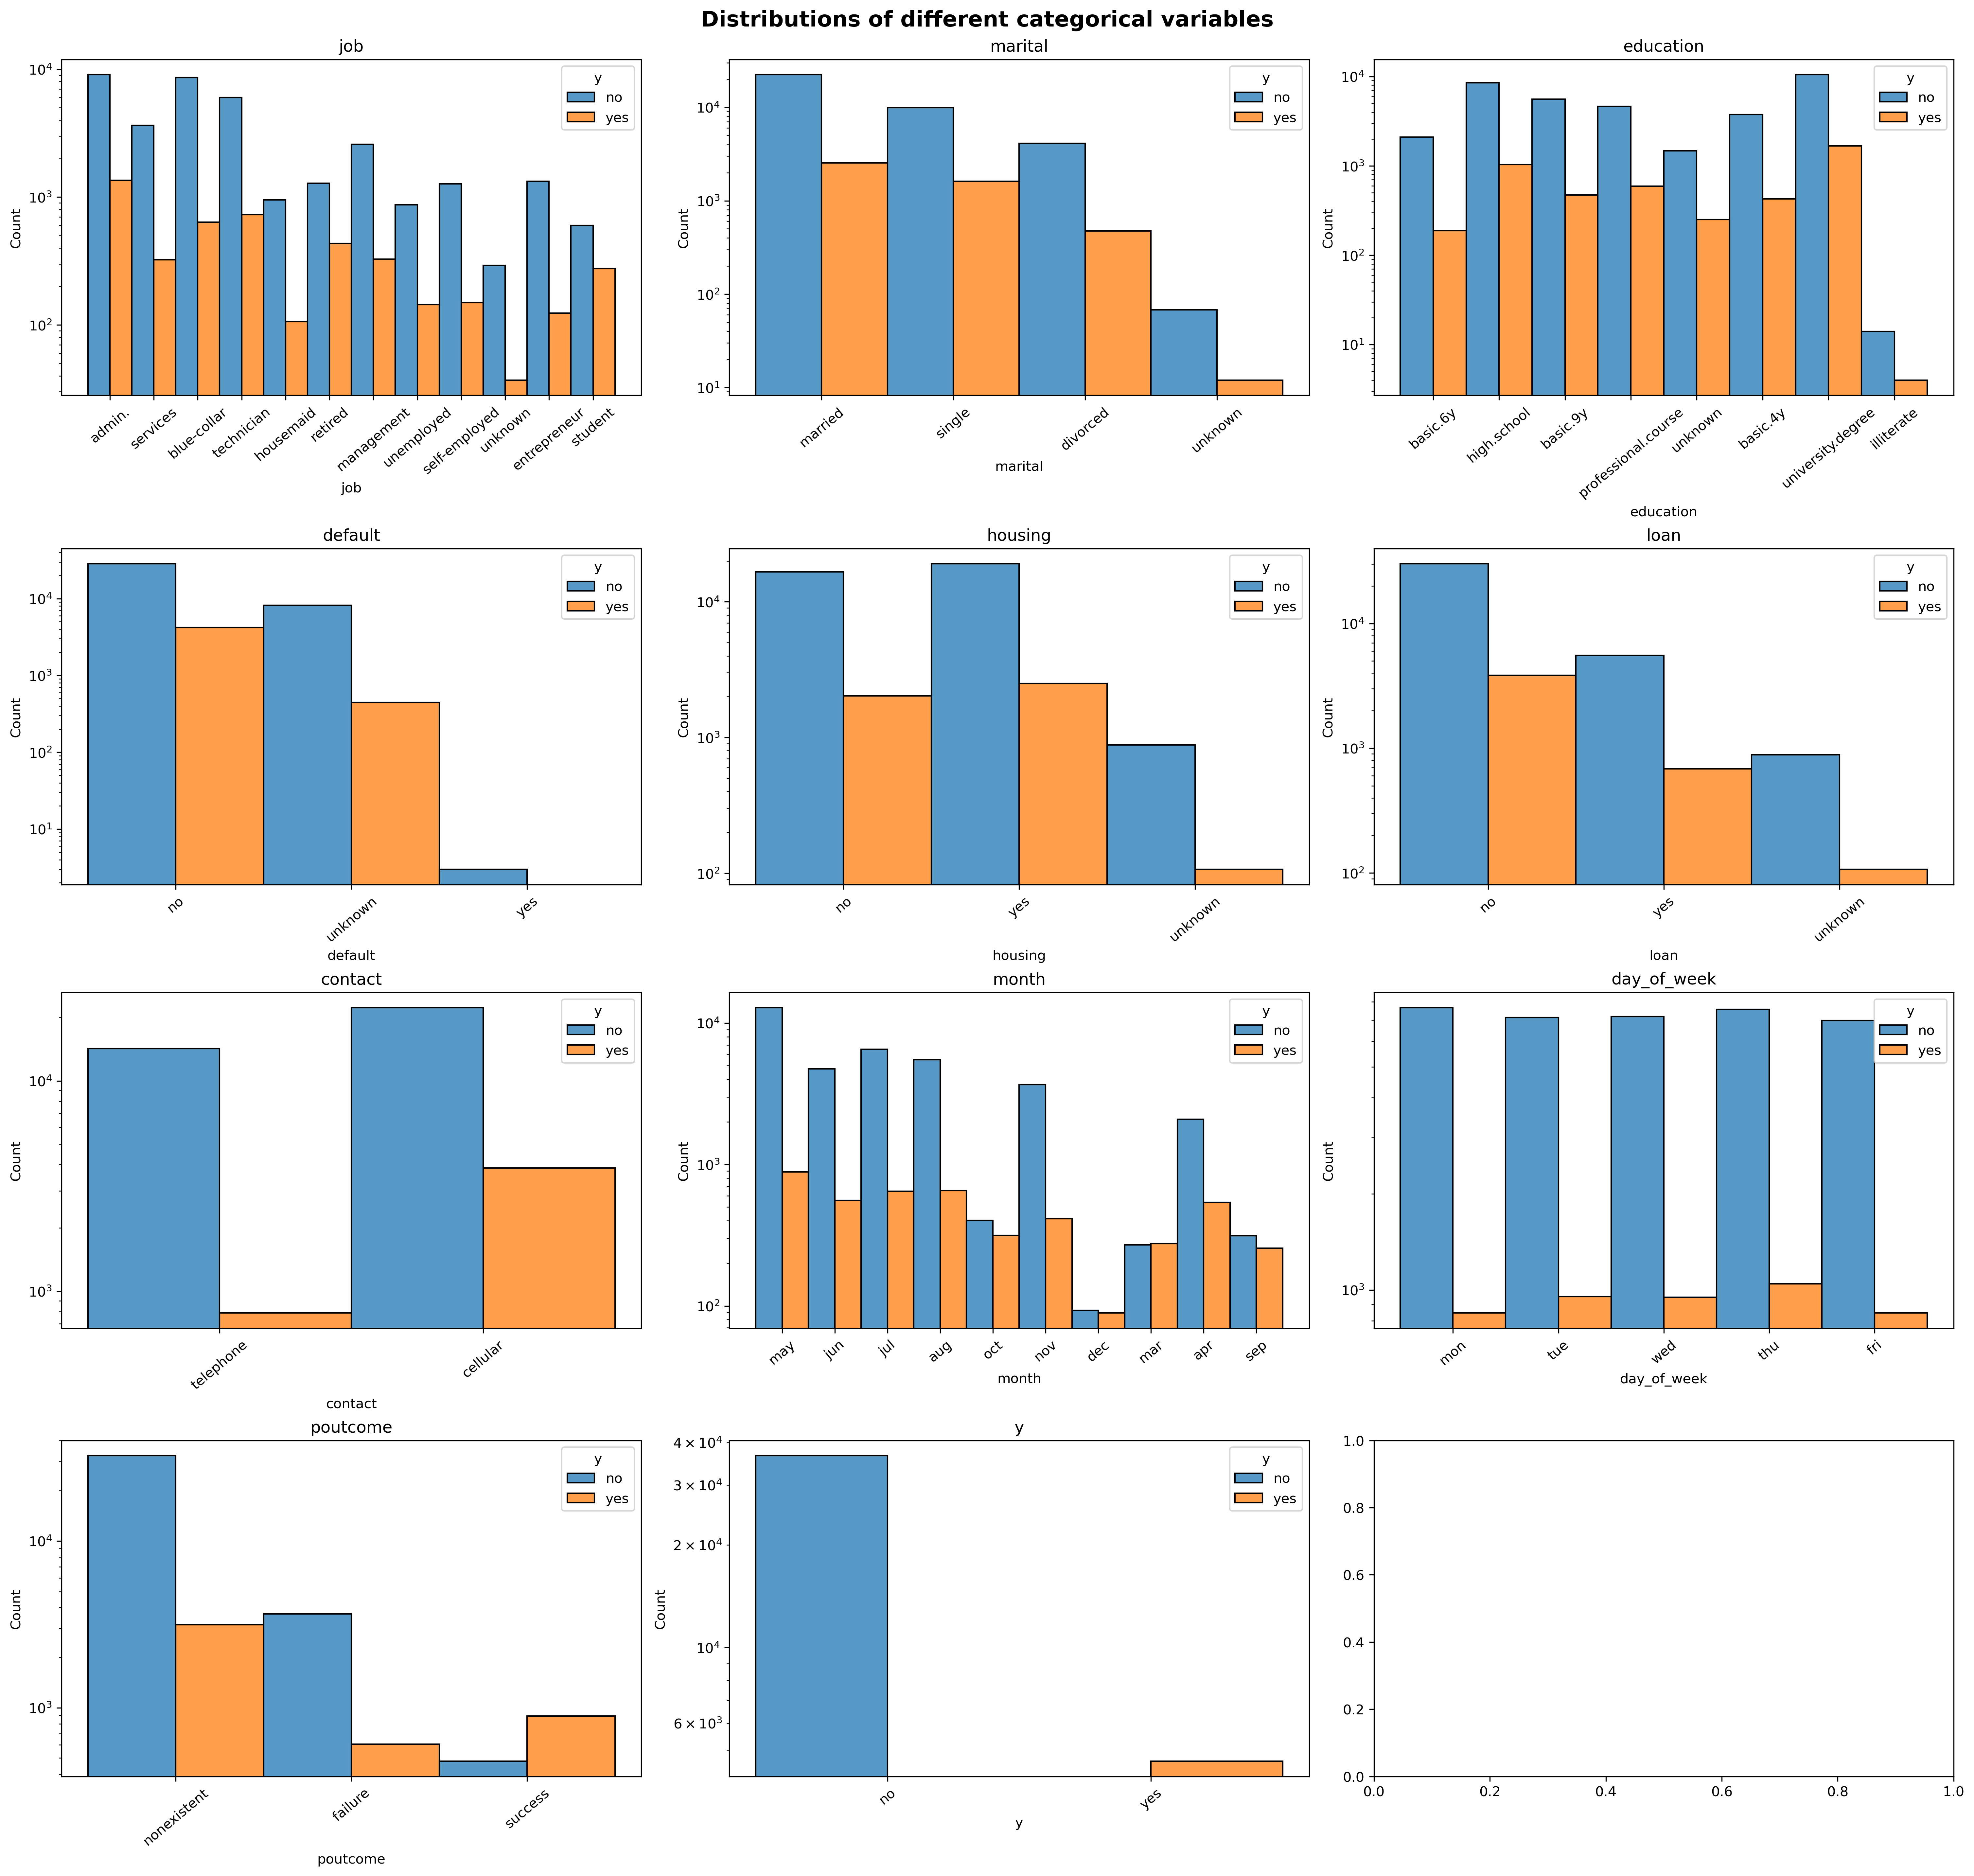

In [33]:
nrow, ncol = 4, 3
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 19), dpi=300, constrained_layout=True)

for i in range(nrow * ncol):
    try:
        ax = plt.subplot(nrow, ncol, i+1)
        sns.histplot(data=data, x=obj_cols[i], hue='y', multiple='dodge', ax=ax)
        ax.set_title(obj_cols[i])
        ax.tick_params(axis='x', labelrotation = 40)
        ax.set_yscale('log')
    except IndexError:
        break
fig.suptitle('Distributions of different categorical variables', weight='bold', size=16)
plt.savefig('cat_var_dist.jpg')
plt.show()

So I see that the top subscriber groups hold admin jobs, are married, have a university degree, a housing loan and no personal loans, have no credit in default, and did not participate in any previous campaign.

Next, a series of violin plots to reveal the distributions of the numerical columns.

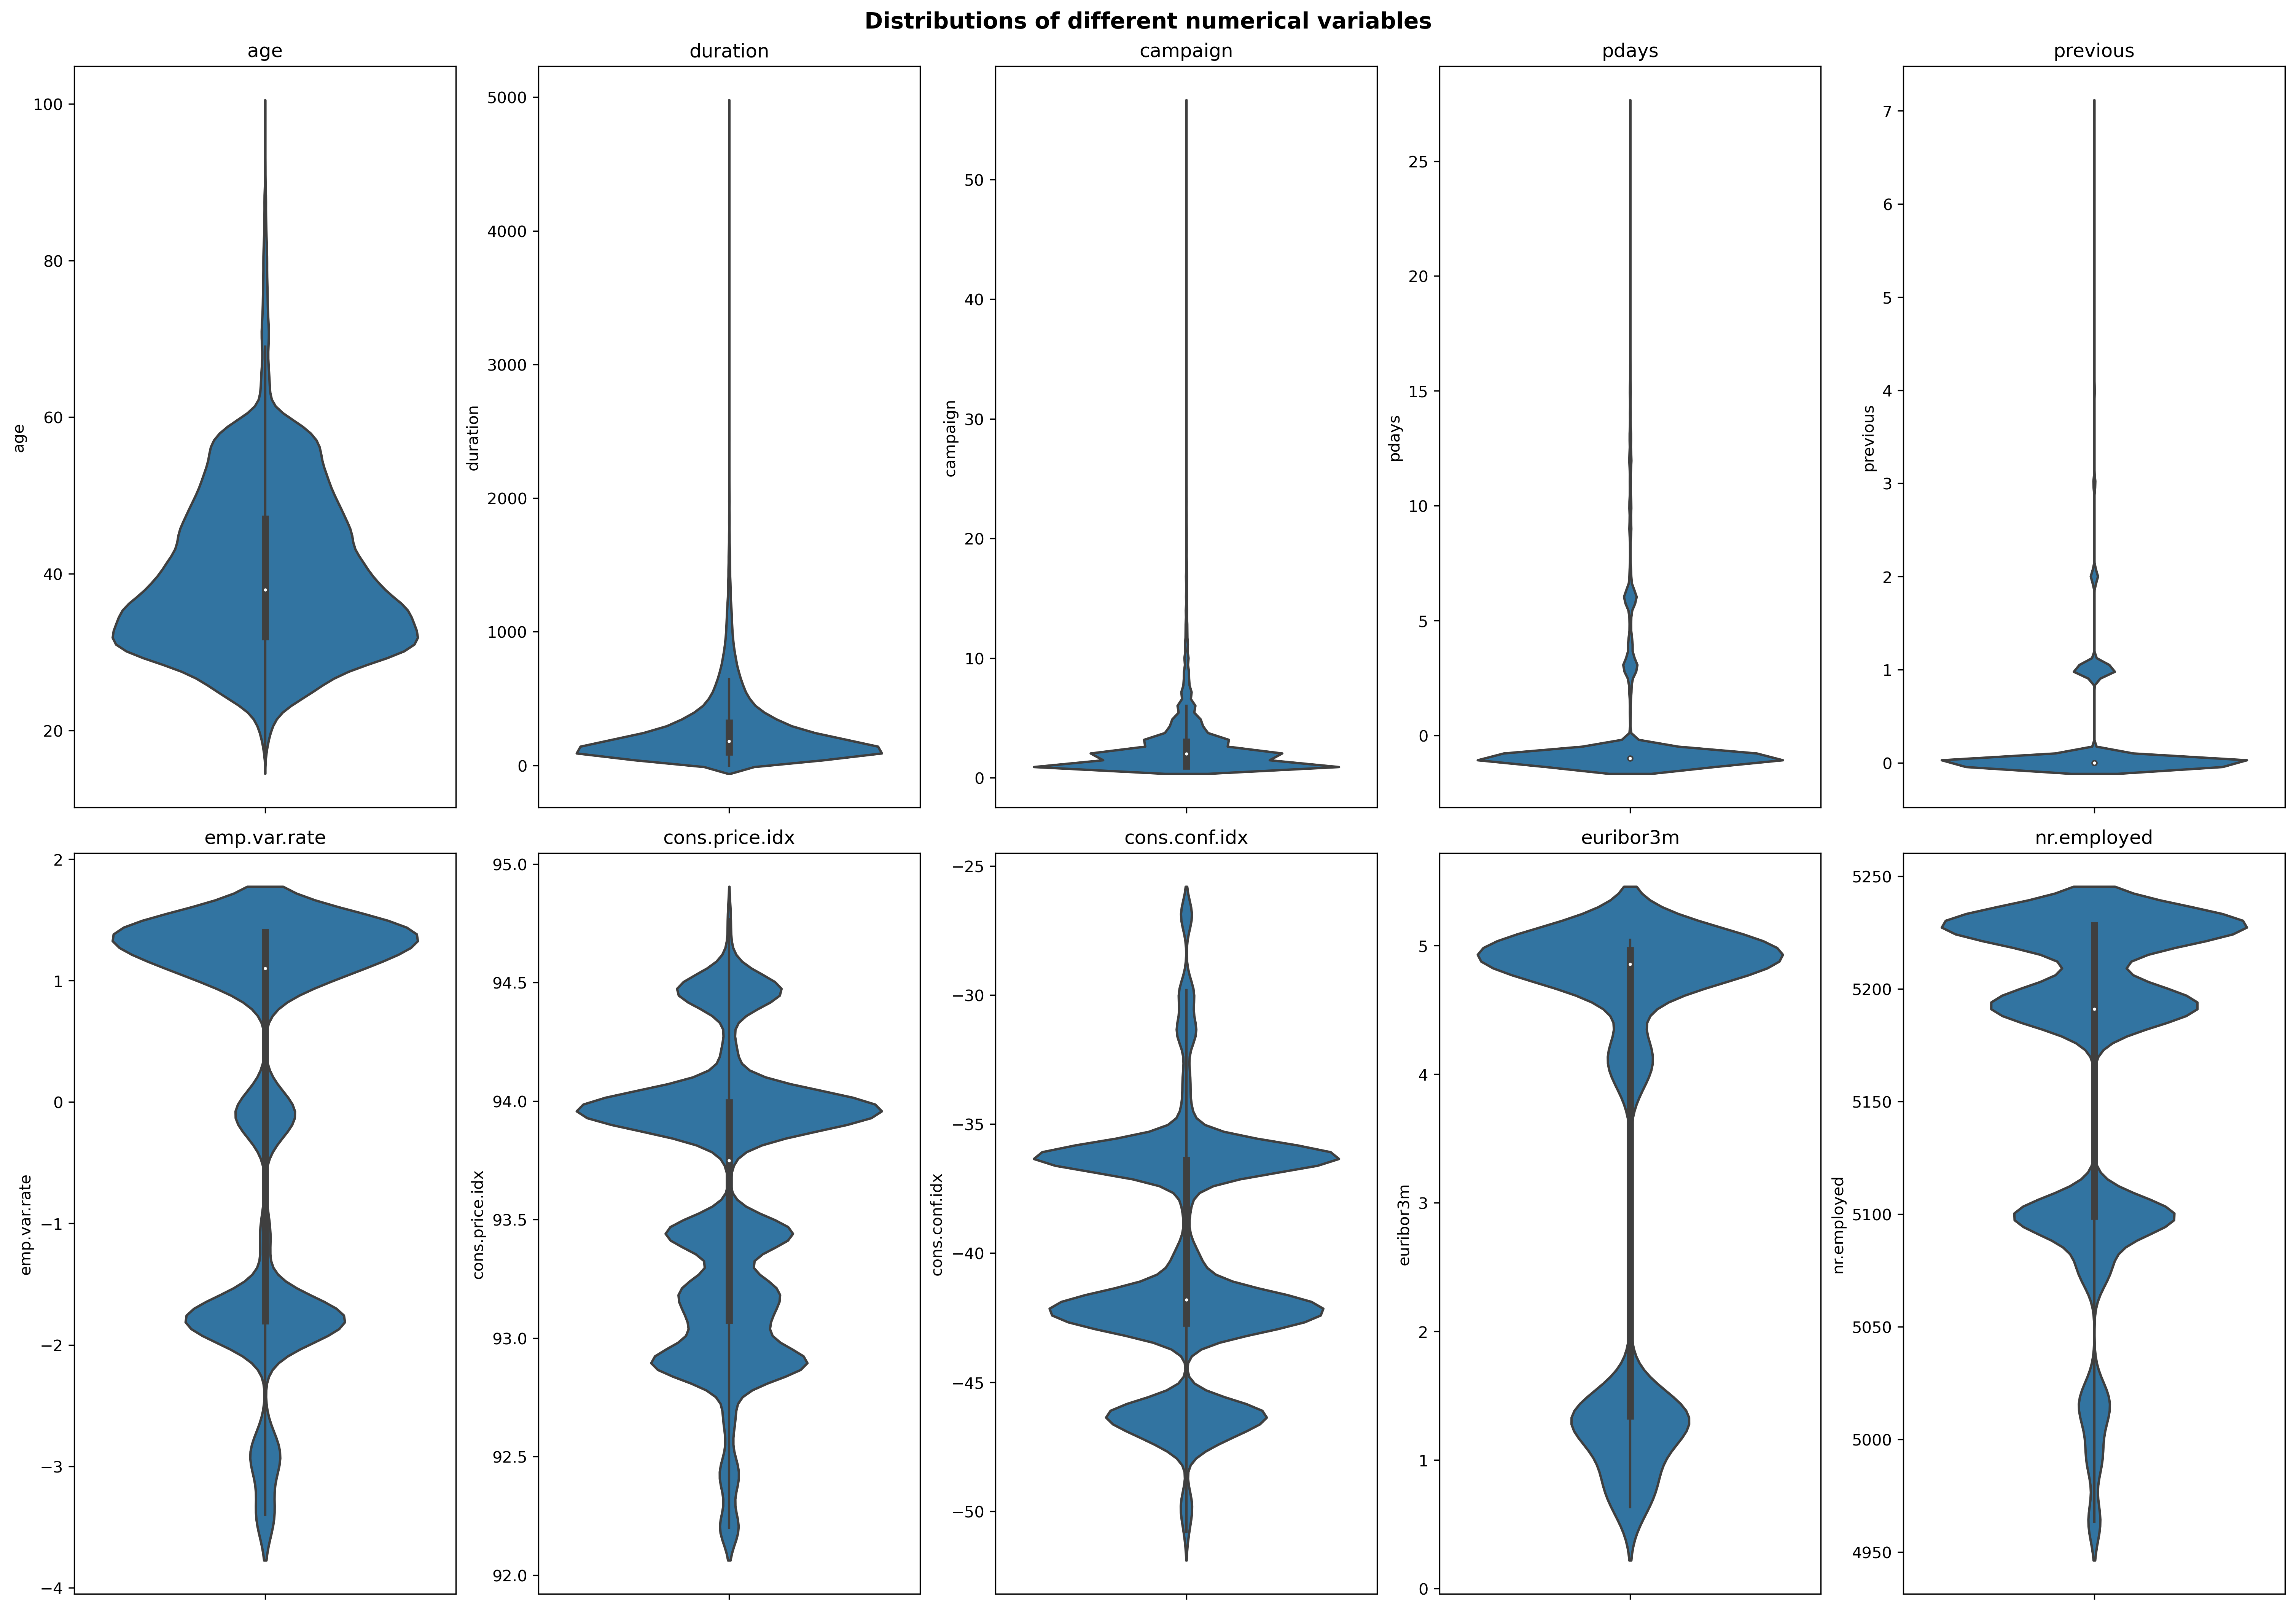

In [35]:
nrow, ncol = 2, 5
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 14), dpi=300, constrained_layout=True)
for i in range(nrow * ncol):
    try:
        ax = plt.subplot(nrow, ncol, i+1)
        sns.violinplot(y=data[num_cols[i]], ax=ax)
        ax.set_title(num_cols[i])
        ax.xaxis.set_tick_params(labelbottom=False)
    except IndexError:
        break

fig.suptitle('Distributions of different numerical variables', weight='bold', size=14)
plt.savefig('num_var_dist.jpg')
plt.show()

Most numerical variables do not follow any standard distribution, and the 5 distributions on the top row are highly skewed. The bottom row looks like mixtures of different distributions.

## Bivariate relationship plots

Since the response variable is binary, I can use bivariate boxplots to see if there is any pattern that differentiates between the no's and yeses. 

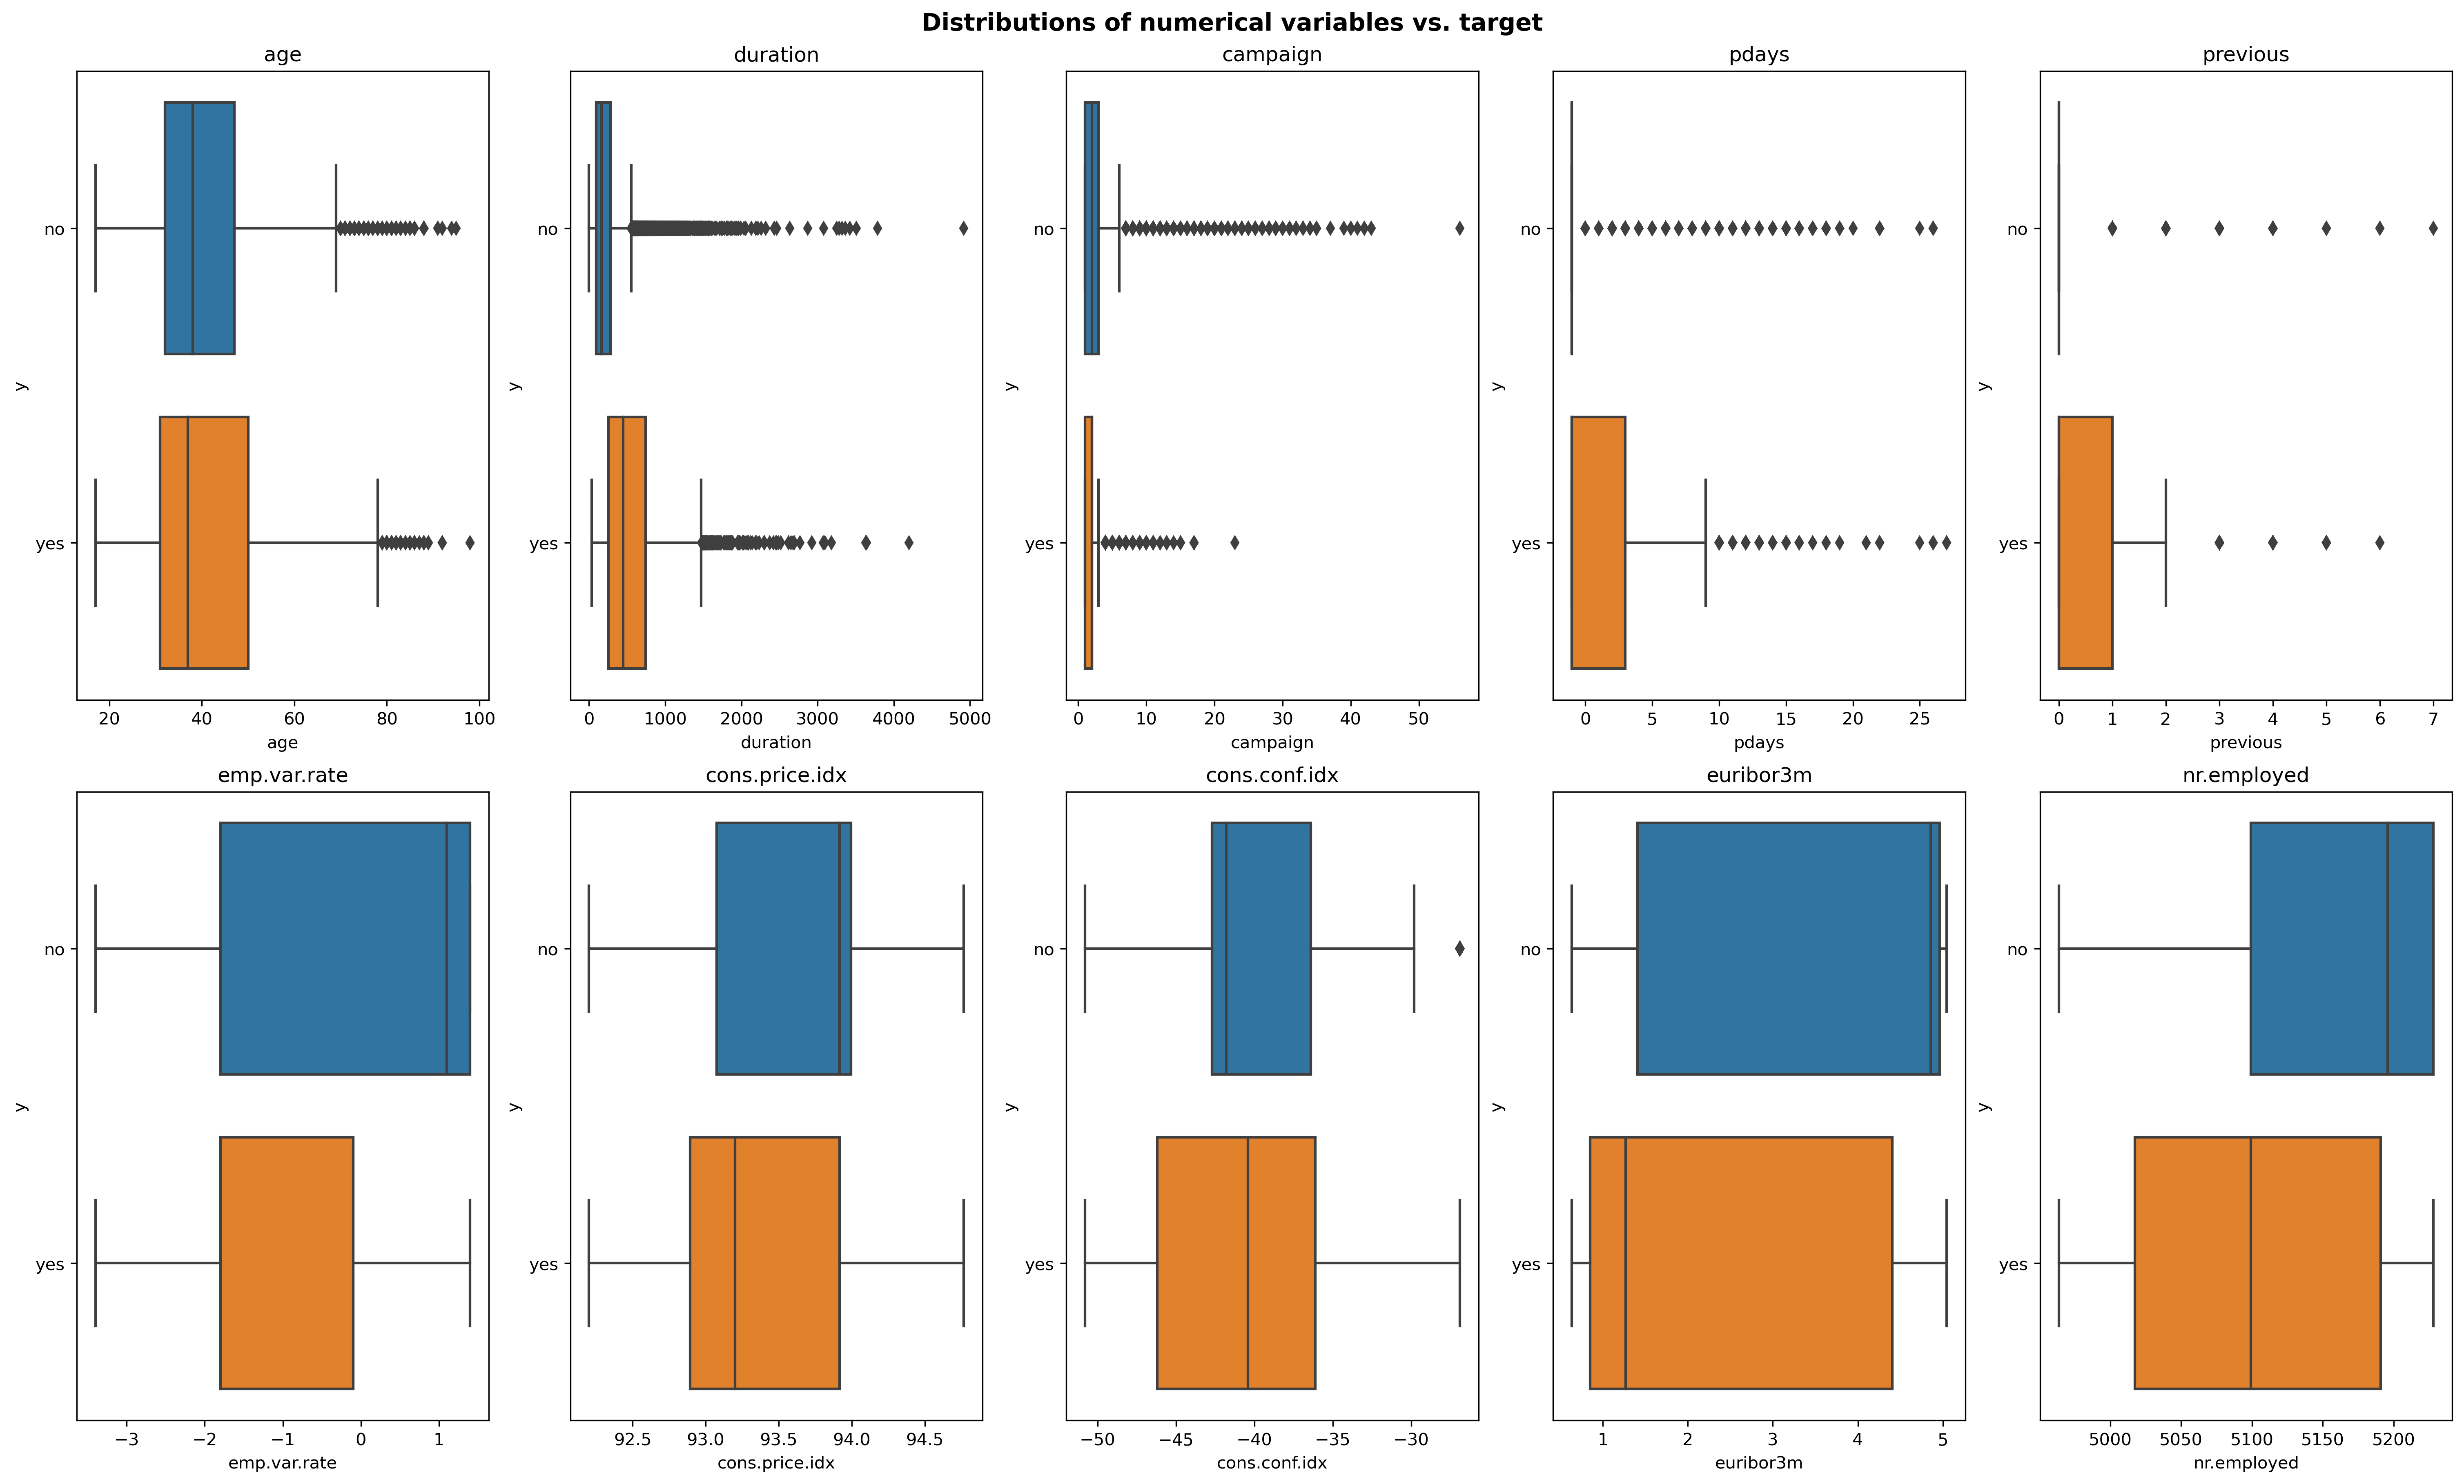

In [36]:
nrow, ncol = 2, 5
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 12), dpi=300, constrained_layout=True)
for i in range(nrow * ncol):
    try:
        ax = plt.subplot(nrow, ncol, i+1)
        sns.boxplot(data=data, y='y', x=num_cols[i], ax=ax)
        ax.set_title(num_cols[i])
    except IndexError:
        break
        
fig.suptitle('Distributions of numerical variables vs. target', weight='bold', size=14)
plt.savefig('num_vs_target.jpg')
plt.show()

The plots show that the variables that may be able to predict the outcome ‘y’ of the campaign are `duration`, `pdays`, `previous`, `emp.var.rate`, and `nr.employed`. These show the most visible discrepancies in their interquartile ranges between the binary outcomes, while the rest is harder to distinguish. Also, these can fit a sigmoid curve fairly well, so logistic regression may be used for modelling.

## Correlation analysis

The last technique I will use is a correlation analysis. I will use the Pearson correlation coefficient to reveal the extent to which the explanatory variables are dependent.

In [37]:
corr = data.corr(method='pearson', numeric_only=True)

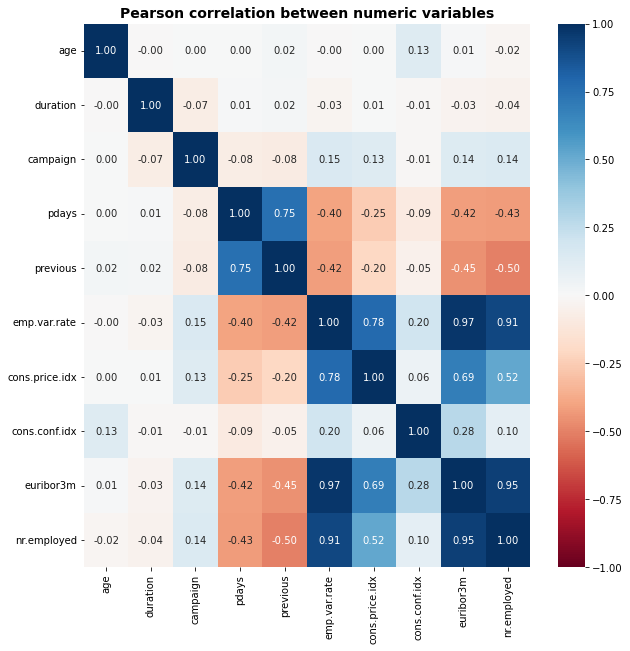

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(
    corr, 
    cmap='RdBu', 
    annot=True,
    fmt='.2f',
    vmax=1, 
    vmin=-1
)
plt.title('Pearson correlation between numeric variables', weight='bold', size=14)
plt.savefig('corr_allnum.jpg')
plt.show()

There are some very highly correlated features off the diagonal, which I would like to examine further. The next cells filter out the pairs with a coefficient greater than 0.6, then plot them on scatterplots:

In [39]:
highly_correlated_features = list(
    set(
        [
            tuple(sorted((var1, var2))) 
            for var2 in corr.index 
            for var1 in corr.columns 
            if (var1 != var2) & (abs(corr.loc[var1, var2]) >= .6)
        ]
    )
)

len(highly_correlated_features)

6

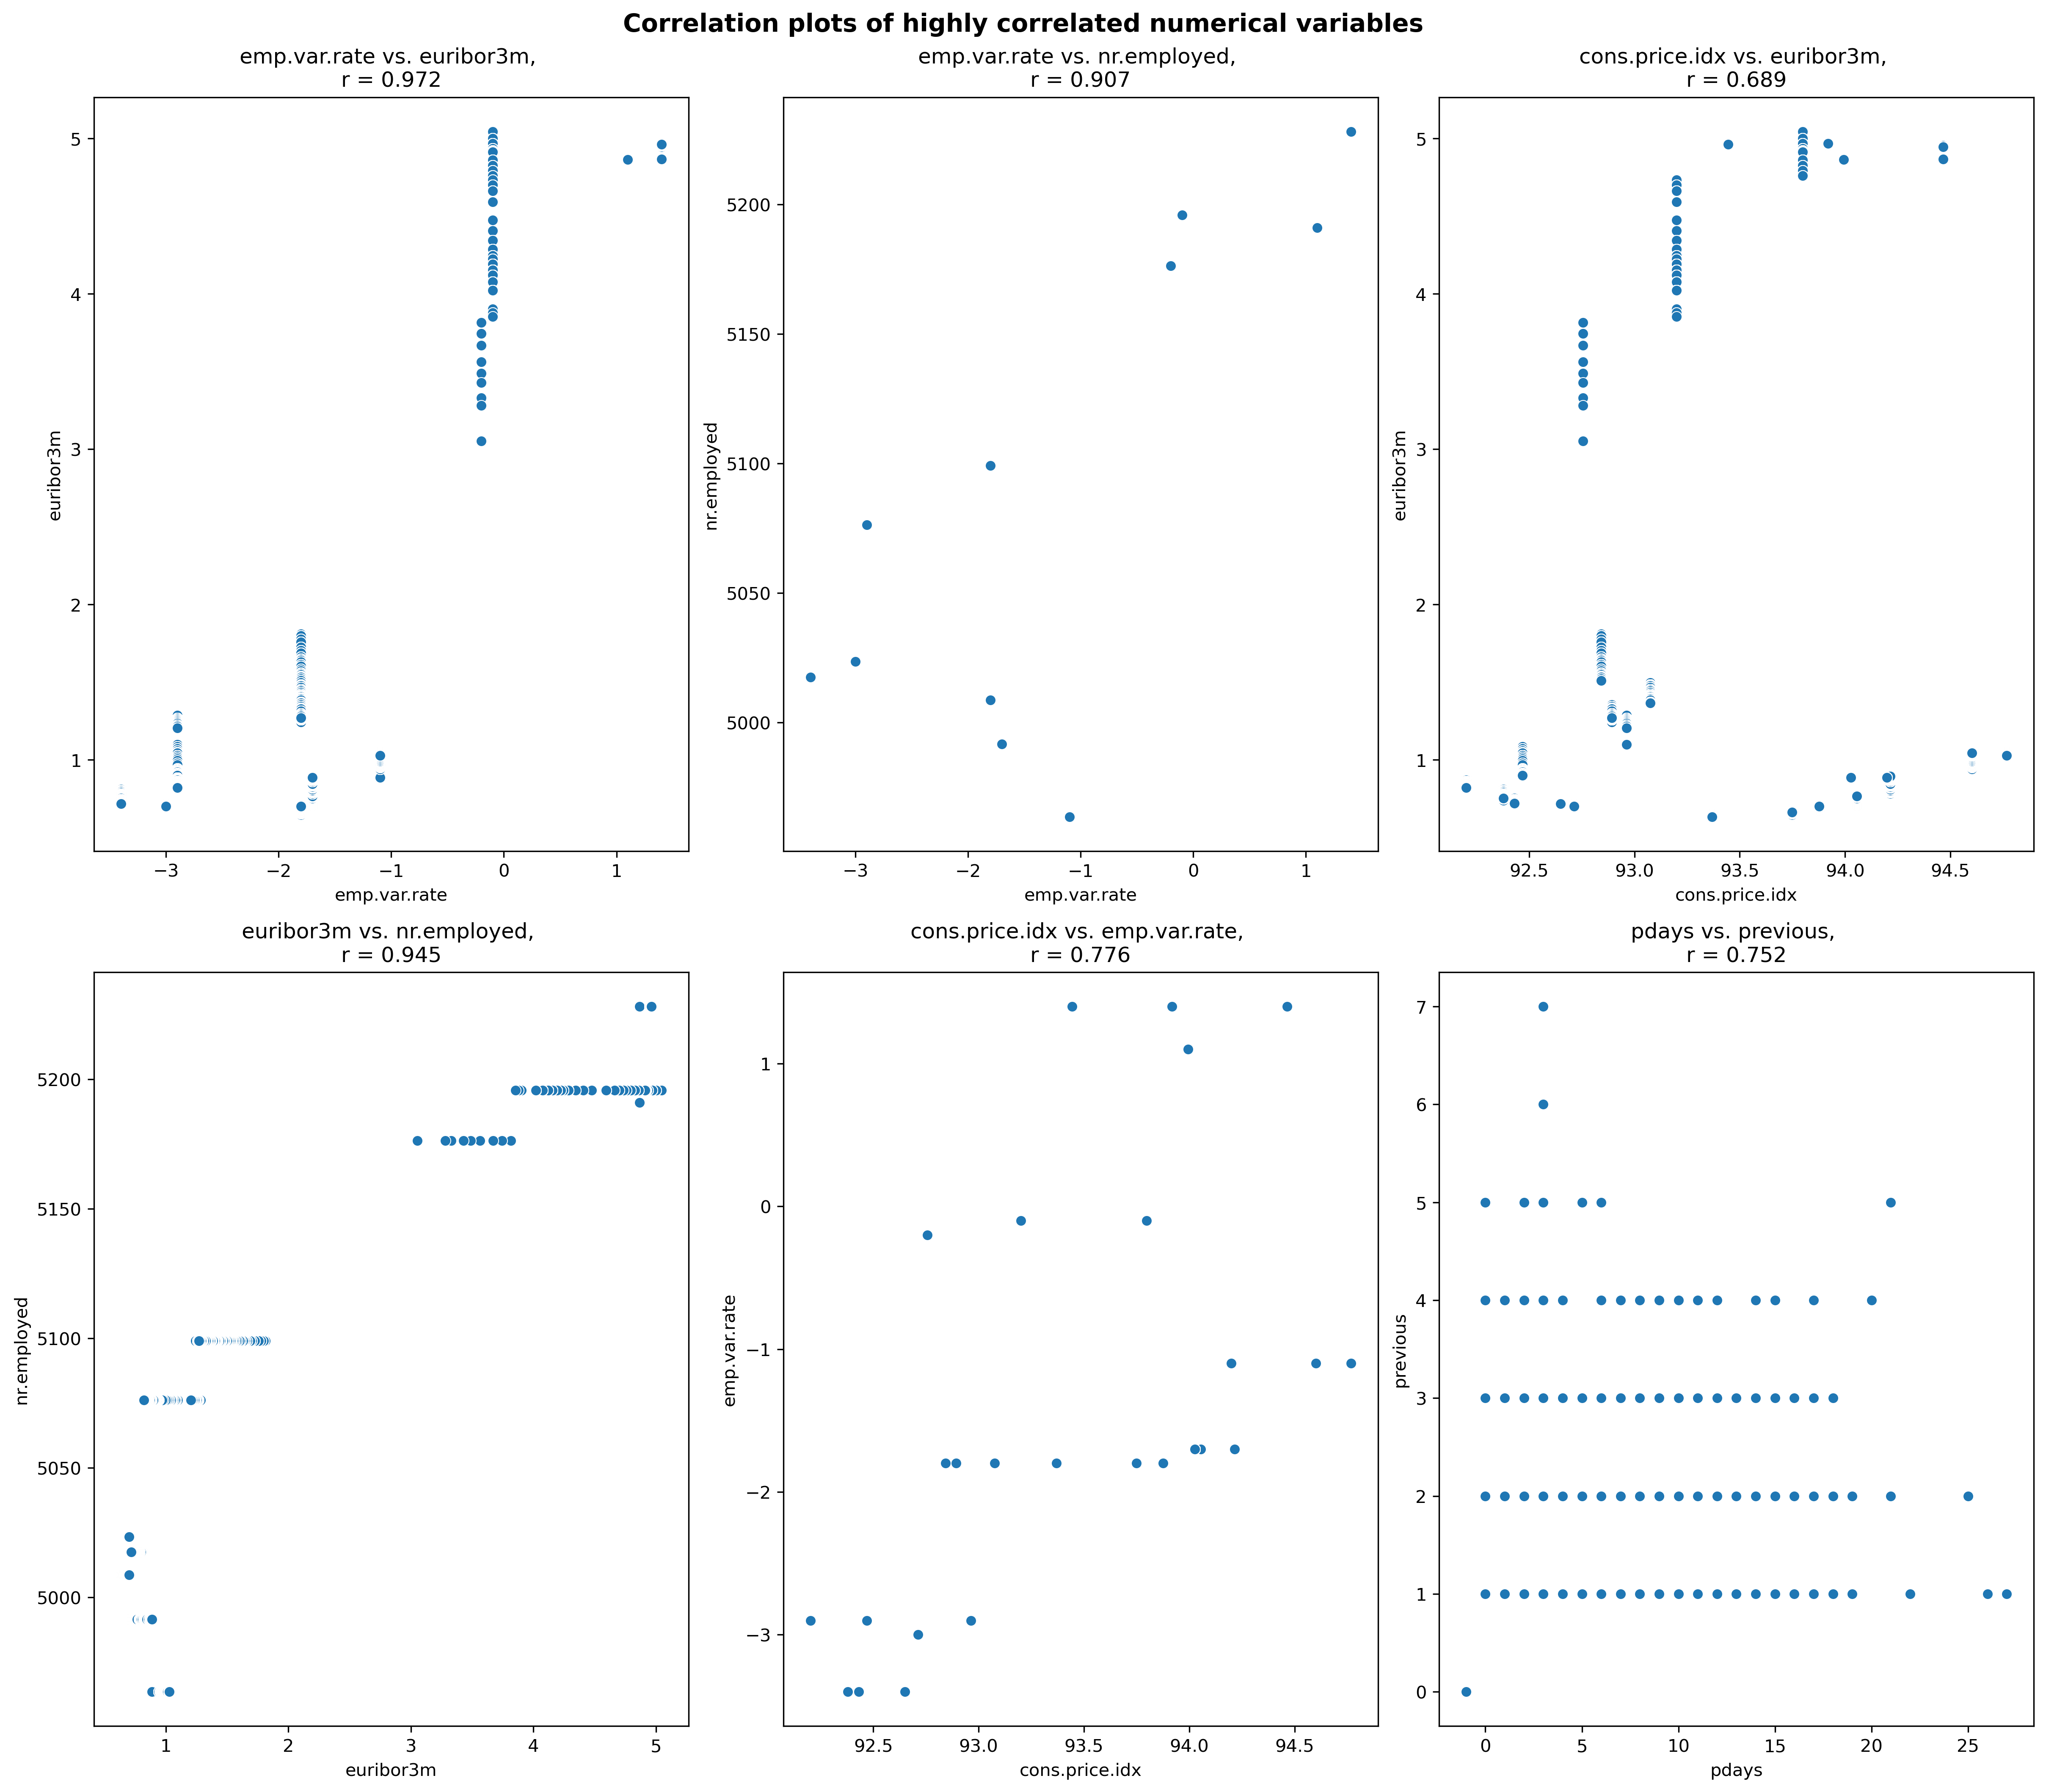

In [40]:
nrow, ncol = 2, 3
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14), dpi=300, constrained_layout=True)
for i in range(nrow * ncol):
    try:
        ax = plt.subplot(nrow, ncol, i+1)
        x=highly_correlated_features[i][0]
        y=highly_correlated_features[i][1]
        sns.scatterplot(
            data=data,
            x=x, 
            y=y, 
            ax=ax
        )
        ax.set_title(
            f'{highly_correlated_features[i][0]} vs. {highly_correlated_features[i][1]}, \nr = {corr.loc[x, y]:.3f}'
        )
    except IndexError:
        break
        
fig.suptitle('Correlation plots of highly correlated numerical variables', weight='bold', size=14)
plt.savefig('corr_highest.jpg')
plt.show()

Although these are highly correlated features, not all of them show a clear linear trend. For example, `pdays` vs. `previous`, which is the pair examined earlier, shows pretty much the same pattern as the initial graph. There is not a clear linear trend for `cons.price.idx` vs. `euribor3m` either. The rest shows roughly linear trends with some noise towards the bottom of their graphs.

# Conclusion

The bivariate plots suggest some linear relationship between explanatory variables and response variable, so a generalised linear model, e.g. logistic regression, may be a good starting point for modelling. Correlation analysis suggests eliminating highly linear explanatory variables to reduce multicollinearity.

We have also seen from categorical distributions the customer segments that are the most responsive to this marketing campaign, so these may be reflected in model interpretation.

# References

Andridge, R. R., & Little, R. J. (2010). A Review of Hot Deck Imputation for Survey Non-response. *International statistical review = Revue internationale de statistique*, 78(1), 40–64. https://doi.org/10.1111/j.1751-5823.2010.00103.x

Nahhas, R. W. (2022, November 4). *3.7 set values to missing | An introduction to R for research*. Bookdown. https://bookdown.org/rwnahhas/IntroToR/missing.html#